In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("water_potability.csv")

In [39]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [40]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [41]:
df.loc[(df['ph'].isna() == True), 'ph'] = df['ph'].mean()
df.loc[(df['Sulfate'].isna() == True), 'Sulfate'] = df['Sulfate'].mean()
df.loc[(df['Trihalomethanes'].isna() == True), 'Trihalomethanes'] = df['Trihalomethanes'].mean()

In [42]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [43]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [44]:
df.groupby('Potability').count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1998,1998,1998,1998,1998,1998,1998,1998,1998
1,1278,1278,1278,1278,1278,1278,1278,1278,1278


In [45]:
## SMOT

In [46]:
y = df['Potability']
X = df.drop(['Potability'], axis = 1)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience = 15)

In [54]:
model = keras.Sequential()

In [55]:
model.add(layers.Dense(20, activation = 'relu', input_dim = 9)) # ReLU(x) = max(0,x)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.add(layers.Dense(1))

In [57]:
opt = keras.optimizers.Adam()

In [58]:
model.compile(loss = 'mean_squared_error', optimizer = opt, metrics = ['accuracy'])

In [59]:
history = model.fit(X_train, y_train, batch_size = 75, epochs = 300, validation_data = (X_test, y_test), callbacks = [early_stopping])

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6001 - loss: 0.2481 - val_accuracy: 0.6311 - val_loss: 0.2349
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6193 - loss: 0.2392 - val_accuracy: 0.6235 - val_loss: 0.2369
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6082 - loss: 0.2401 - val_accuracy: 0.6311 - val_loss: 0.2358
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5802 - loss: 0.2454 - val_accuracy: 0.6326 - val_loss: 0.2341
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6139 - loss: 0.2382 - val_accuracy: 0.6372 - val_loss: 0.2365
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5968 - loss: 0.2425 - val_accuracy: 0.6372 - val_loss: 0.2334
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5998 - loss: 0.2425 - val_accuracy: 0.6433 - val_loss: 0.2355
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6181 - loss: 0.2375 - val_accuracy: 0.6418 - v

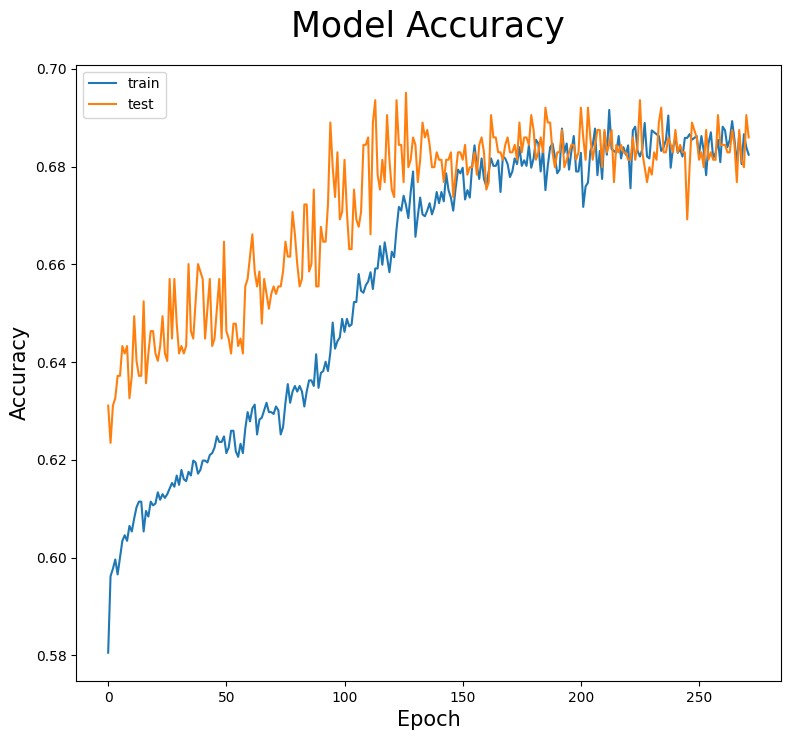

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize = [20,8])

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size = 25, pad = 20)
plt.ylabel('Accuracy', size = 15)
plt.xlabel('Epoch', size = 15)
plt.legend(['train','test'], loc = 'upper left')

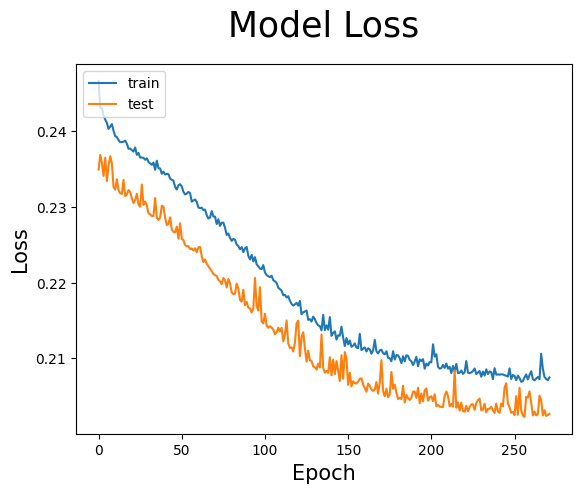

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size = 25, pad = 20)
plt.ylabel('Loss', size = 15)
plt.xlabel('Epoch', size = 15)
plt.legend(['train','test'], loc = 'upper left')

In [64]:
## ROC Curve

In [67]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(X_test).ravel()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [69]:
fpr_keras, tpr_keras, threshold_keras = roc_curve(y_test, y_pred_keras)

In [70]:
from sklearn.metrics import auc

In [71]:
auc_keras = auc(fpr_keras, tpr_keras)

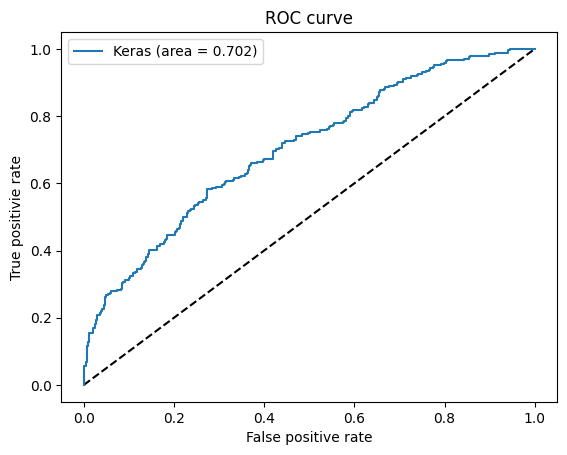

In [72]:
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_keras, tpr_keras, label = 'Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positivie rate')
plt.title('ROC curve')
plt.legend(loc = 'best')
plt.show()